# 10. Course project

## World Happiness Report

* GDP per capita
* healthy years of life expectancy
* social support (as measured by having someone to count on in times of trouble)
* trust (as measured by a perceived absence of corruption in government and business)
* perceived freedom to make life decisions
* generosity (as measured by recent donations)
* dystopia (benchmark country corresponding to the lowest possible values in each of the criteria)

In [1]:
#import
import pandas as pd
import numpy as np

## A. Importing, cleaning and numerical summaries

### 1. Download the data set data.csv from the Resources tab
### 2. Import the data as a pandas DataFrame.

In [2]:
src_path = 'data\happines_data.csv'
df = pd.read_csv(src_path)

### 3. Check the number of observations.

In [3]:
df.size ## number of cells (1836)
len(df.index) ## number of rows
#df.shape[0]

153

### 4. Obtain the column headings.

In [4]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

### 5. Check the data type for each column.

In [5]:
df.info() ## type and null 
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

### 6. Check if there are any missing values.

In [6]:
df.isnull().sum()


Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

### 7. Remove missing values

In [7]:
    ## out null value
    df2 = df.dropna()
    df2.shape[0]

151

In [8]:
 #change index
df2.set_index('Country', inplace=True)

In [9]:
# set Ukraine on eastern Europe
df2.loc[df2.Region =='Europe', 'Region']='Eastern Europe'

C:\Users\valen\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 8. Obtain the mean, minimum and maximum value

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,151.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,68.950000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


### 9. 10 happiest countries

In [11]:
df.nsmallest(10,'Happiness Rank')

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


In [12]:
### 10. 10 least happy countries

In [13]:
df.nlargest(10,'Happiness Rank',keep='first')

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
61,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific


## B. Indexing and grouping

### 1. Group the data points by region

In [14]:
# crete list of regions
regions = df2['Region'].unique()

In [15]:
# for each, create a new file on ./data folder
for i  in range(len(regions)):
    region = df2[df2['Region'] == regions[i]]
    # COMMENT FOR THE RESTART OF THE KERNEL 
    # region.to_csv('data\happiness_r_'+ regions[i]+'.csv')
## df2.region

In [16]:
# create dataframe with data for eac region, columns create on demand
group_info = pd.DataFrame(regions, columns=['name'])



### 2.  Mean happiness score for each region

In [17]:
group_info['Happiness mean'] = np.nan
# for loop, separate for reading purpose
for i  in range(len(regions)):
    region = df2[df2['Region'] == regions[i]]
    group_info.loc[group_info.index == i, 'Happiness mean'] = region['Happiness Score'].mean()

group_info.sort_values(by='Happiness mean', ascending=False)

,name,Happiness mean
5,North America,7.154500
0,Western Europe,6.880474
4,Latin America,5.957818
2,Eastern Europe,5.435182
3,Asia-Pacific,5.358326
1,Africa,4.254581


### 3. number of countries in each region that have a happiness score above 6.0

In [18]:
group_info['Happiness above 6'] = np.nan
# for loop, separate for reading purpose
for i  in range(len(regions)):
    region = df2[df2['Region'] == regions[i]]
    #print(region[region['Happiness Score']>6].count().unique())
    group_info.loc[group_info.index == i, 'Happiness above 6']=region[region['Happiness Score']>6].count().unique()

### 4. difference between the maximum and minimum happiness score

In [19]:
group_info['Max Happiness'] = np.nan
group_info['Min Happiness'] = np.nan
group_info['Difference Happiness'] = np.nan
# for loop, separate for reading purpose
for i  in range(len(regions)):
    region = df2[df2['Region'] == regions[i]]
    max_value = region['Happiness Score'].max()
    min_value = region['Happiness Score'].min()
    group_info.loc[group_info.index == i, 'Max Happiness']=max_value
    group_info.loc[group_info.index == i, 'Min Happiness']=min_value
    group_info.loc[group_info.index == i, 'Difference Happiness']=max_value-min_value

## C. Bar plot of the Happiness Score

### 1.

Obtain a horizontal bar plot of the Happiness Score of the top 10 happiest countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.

In [20]:
import matplotlib.pyplot as plt # plot library 

In [21]:
df_10happy = df.nlargest(10,'Happiness Score')

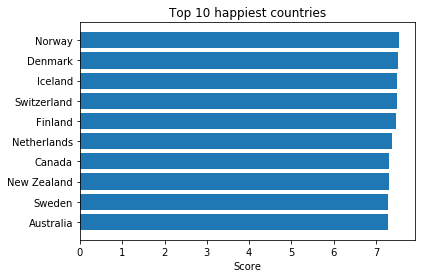

In [22]:
X = df_10happy['Happiness Score']
Y = df_10happy.Country
plt.barh(Y,X)
plt.title('Top 10 happiest countries')
#plt.ylabel('')
plt.xlabel('Score')
plt.gca().invert_yaxis() # thx https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down
#bar_plot.invert_yaxis()... TODO check gca() f
plt.show()

### 2.

Adapt the code for the horizontal bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:

In [23]:
## keep this solution because time invest, please consider the next one  
## find how to enlarge colums but not space between value...
Y = df_plot.Country

X_eco = df_plot.Economy
X_fam = df_plot.Family
X_health = df_plot.Health
X_freedom = df_plot.Freedom
X_gen = df_plot.Generosity
X_corr = df_plot.Corruption
X_dysto = df_plot.Dystopia

plt.bar(Y,X_eco, label='Economy')
plt.bar(Y,X_fam, bottom=X_eco, label='Family')
plt.bar(Y,X_health, bottom=X_eco+X_fam, label='Health')
plt.bar(Y,X_freedom, bottom=X_eco+X_fam+X_health, label='Freedom')
plt.bar(Y,X_gen, bottom=X_eco+X_fam+X_health+X_freedom, label='Generosity')
plt.bar(Y,X_corr, bottom=X_eco+X_fam+X_health+X_freedom+X_gen, label='Corruption')
plt.bar(Y,X_dysto, bottom=X_eco+X_fam+X_health+X_freedom+X_gen+ X_corr, label='Dystopia')

plt.legend(loc="upper right") # function reversed() possible
plt.show()

NameError: name 'df_plot' is not defined

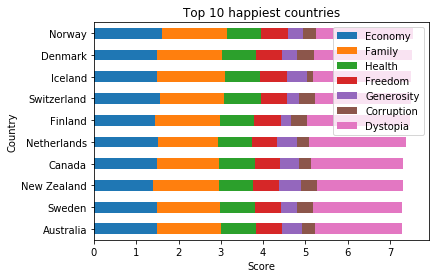

In [59]:
#df_plot.set_index('Country', )
df_plot = pd.DataFrame(df_10happy, columns=['Country','Economy', 'Family','Health', 'Freedom','Generosity','Corruption','Dystopia'])
df_plot.set_index('Country', inplace=True)
df_plot.plot.barh(stacked=True)

plt.title('Top 10 happiest countries')
#plt.ylabel('')
plt.xlabel('Score')
plt.gca().invert_yaxis()
plt.show()

### 3.

Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

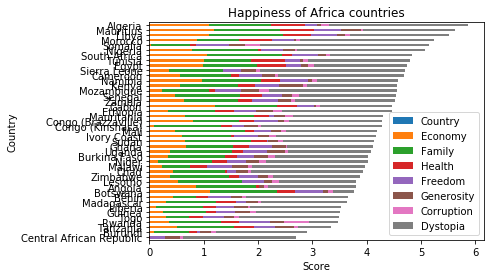

In [36]:
df_africa =  df2[df2.Region == 'Africa']
df_plot = pd.DataFrame(df_africa.sort_values(by=['Happiness Score'], ascending=False), columns=['Country','Economy', 'Family','Health', 'Freedom','Generosity','Corruption','Dystopia'])
df_plot.plot.barh(stacked=True)

plt.title('Happiness of Africa countries')
#plt.ylabel('')
plt.xlabel('Score')
plt.gca().invert_yaxis()
plt.show()

## D. Histogram of Job Satisfaction

Obtain a histogram of the Job Satisfaction using the following categories:

* 40%-50%
* 50%-60%
* 60%-70%
* 70%-80%
* 80%-90%
* 90%-100%

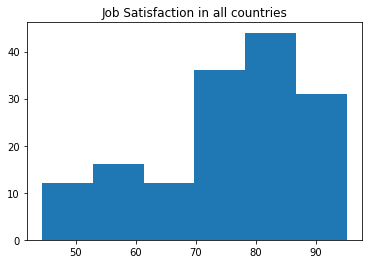

In [54]:
X = df2['Job Satisfaction']

#plt.xlim(left=40,right=100)
plt.title('Job Satisfaction in all countries')
plt.xlabel = 'Job Satisfaction in %'
plt.ylabel = 'number of countries'
plt.hist(X, bins=6,)
plt.show()


## E. Pairwise Scatter plots

Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

In [55]:
import seaborn as sns

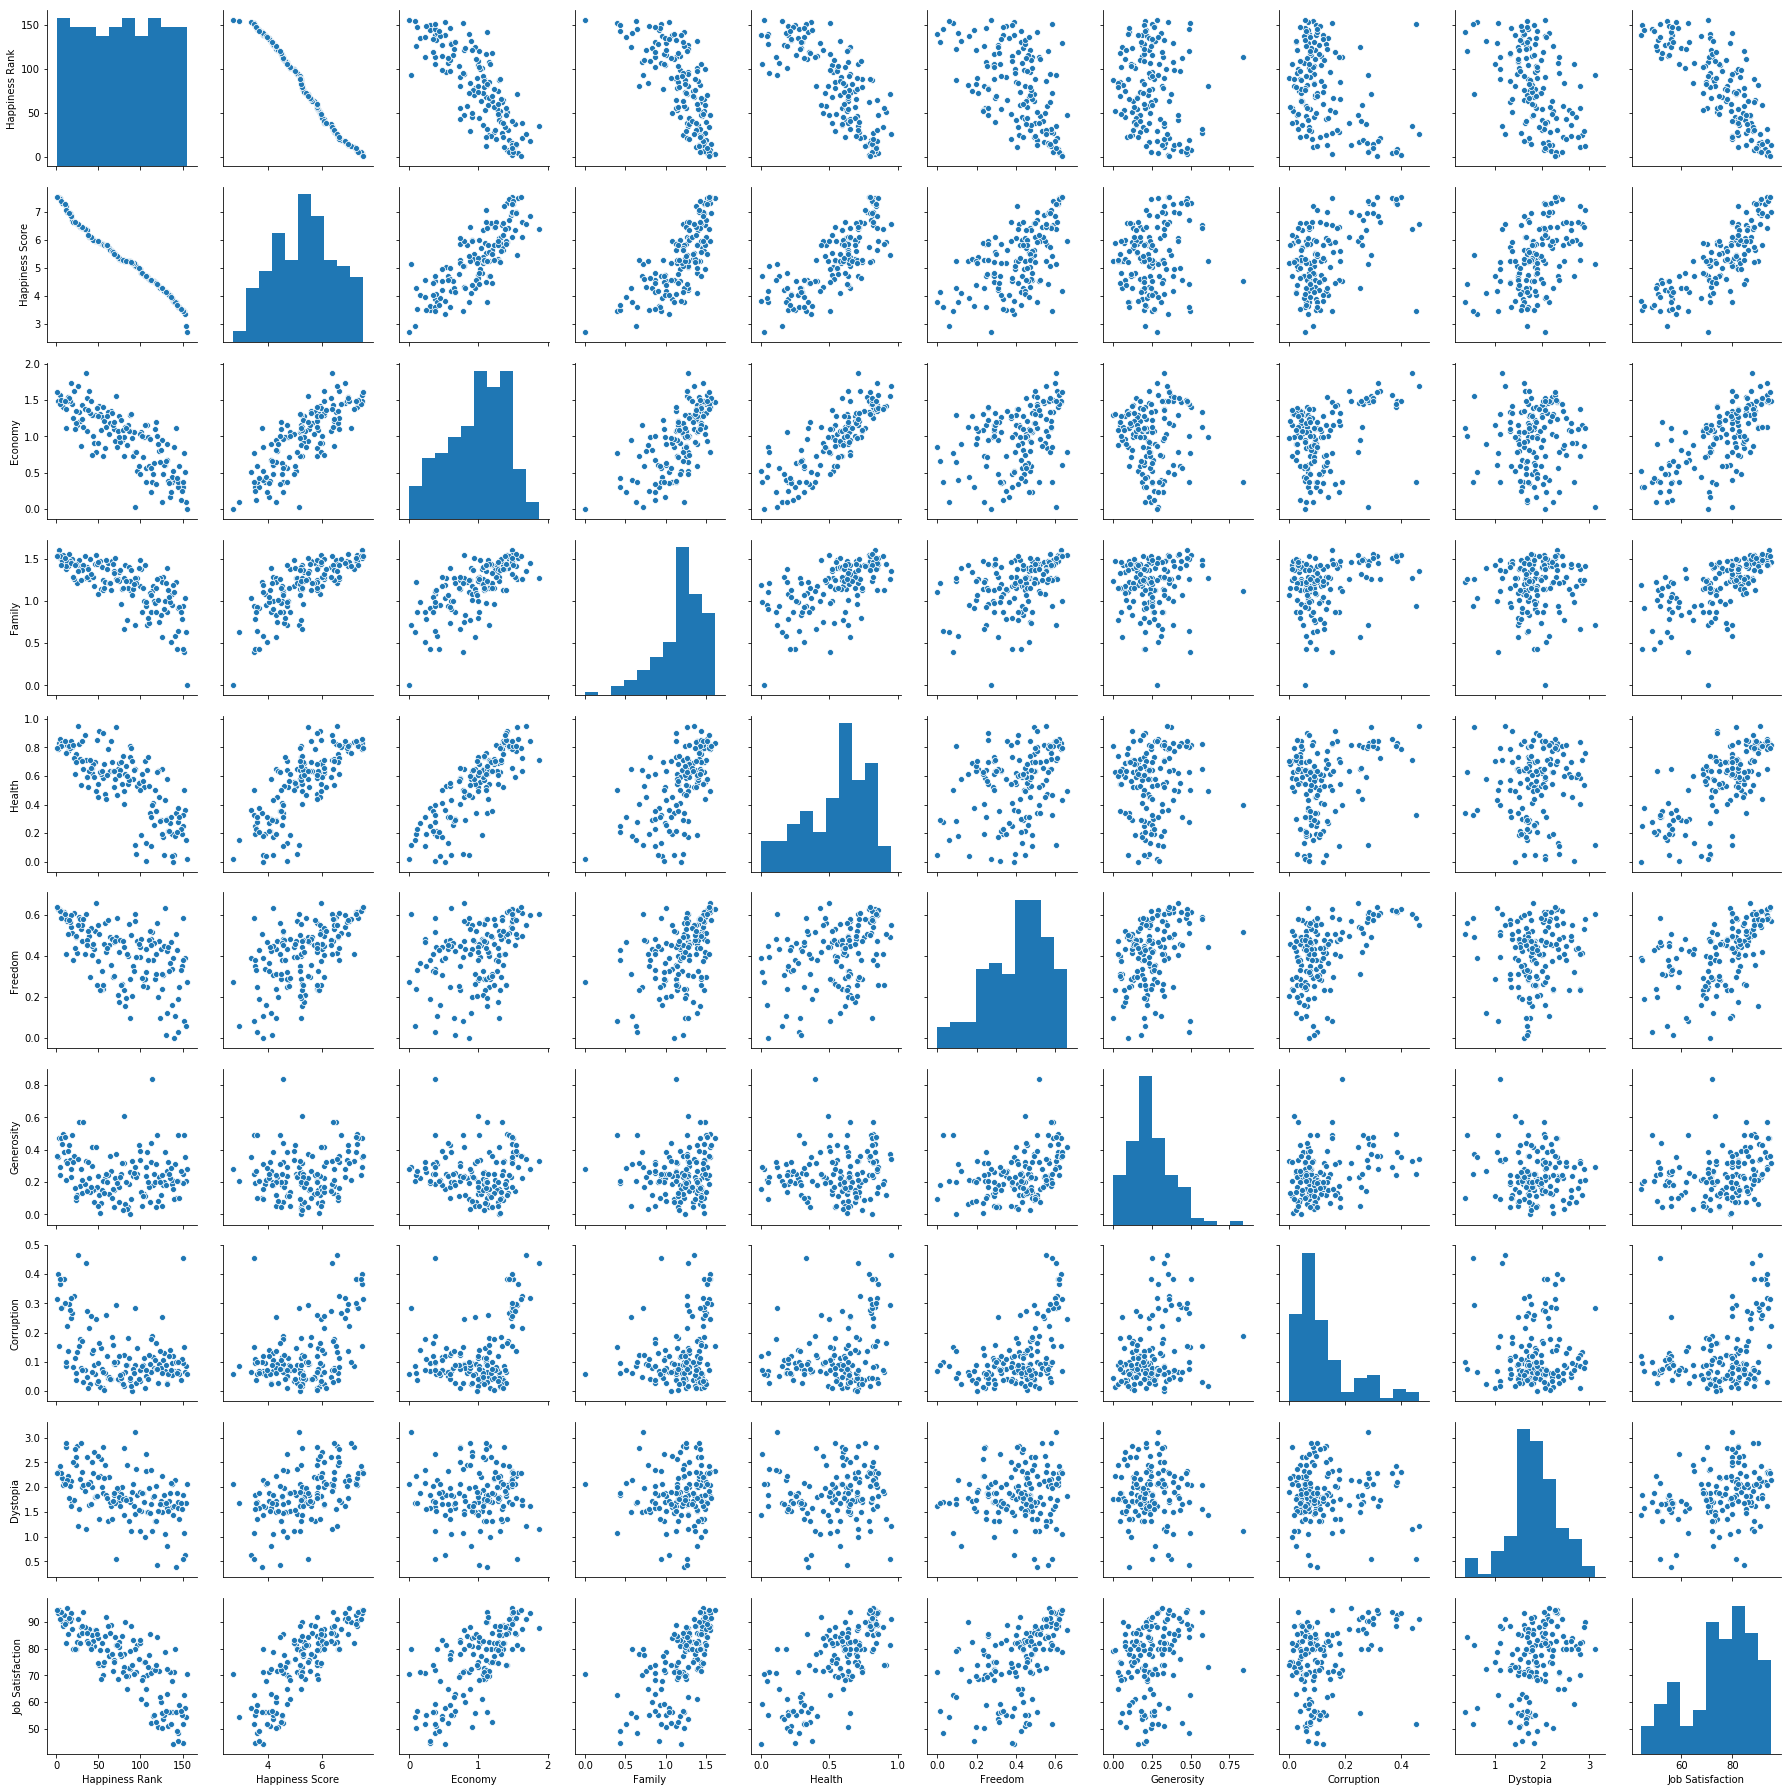

In [56]:
sns.pairplot(df2)

## F. Correlation
Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [55]:
df_score = df2[['Happiness Score']]
df_score.corrwith(df2)
df2.corr()['Happiness Score']
#data[data.columns[1:]].corr()['special_col'][:-1]

Happiness Rank     -0.992663
Happiness Score     1.000000
Economy             0.808678
Family              0.749612
Health              0.777731
Freedom             0.567948
Generosity          0.164123
Corruption          0.438262
Dystopia            0.481117
Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

## G. Probabilities
Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

In [59]:
import random

In [80]:
# df of Western Europe
df_w_europe =  df2[df2.Region == 'Western Europe']

17

In [87]:
#  Proba to get randomly a western europe country with more than 6 happiness score ==> more than 6 /total_country
total_country = len(df_w_europe['Happiness Score']>6)

#  Western Europe happiness countries score > 6
country_more_6 = len(df_w_europe[df_w_europe['Happiness Score']>6])

proba = country_more_6 / total_country
print(str(round(proba*100,2)) + '%')

89.47%


## H. Matrices
Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.


In [40]:
df_matrix = pd.crosstab(df2.index,df2.Region)
# ... function working better than expected... nice!
df_matrix

Region,Africa,Asia-Pacific,Eastern Europe,Latin America,North America,Western Europe
row_0,,,,,,
Afghanistan,0,1,0,0,0,0
Albania,0,0,1,0,0,0
Algeria,1,0,0,0,0,0
Angola,1,0,0,0,0,0
Argentina,0,0,0,1,0,0
Armenia,0,1,0,0,0,0
Australia,0,1,0,0,0,0
Austria,0,0,0,0,0,1
Azerbaijan,0,1,0,0,0,0


In [38]:
#convert Dataframe to array matrix
matrix = np.array(df_matrix) 

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
 